In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader, random_split
from torchvision import datasets, transforms
from PIL import Image
import matplotlib.pyplot as plt
import random

## Define CNN Model

In [2]:
class FaceCNN(nn.Module):
    def __init__(self, num_classes):
        super(FaceCNN, self).__init__()
        self.conv1 = nn.Conv2d(3, 32, kernel_size=3, padding=1)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, padding=1)
        self.gap = nn.AdaptiveAvgPool2d((7, 7))  # reduce spatial size
        self.fc1 = nn.Linear(64 * 7 * 7, 256)
        self.fc2 = nn.Linear(256, num_classes)
        self.dropout = nn.Dropout(0.5)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = self.gap(x)
        x = x.view(x.size(0), -1)
        x = F.relu(self.fc1(x))
        x = self.dropout(x)
        x = self.fc2(x)
        return x


In [10]:
class FaceCNN(nn.Module):
    def __init__(self, num_classes):
        super(FaceCNN, self).__init__()
        self.conv1 = nn.Conv2d(3, 32, kernel_size=3, padding=1)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, padding=1)
        self.conv3 = nn.Conv2d(64, 128, kernel_size=3, padding=1)
        self.pool = nn.MaxPool2d(2, 2)
        self.gap = nn.AdaptiveAvgPool2d((7, 7))   # reduce feature map size
        self.fc1 = nn.Linear(128 * 7 * 7, 256)
        self.dropout = nn.Dropout(0.5)
        self.fc2 = nn.Linear(256, num_classes)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = self.pool(F.relu(self.conv3(x)))
        x = self.gap(x)
        x = x.view(x.size(0), -1)
        x = F.relu(self.fc1(x))
        x = self.dropout(x)
        x = self.fc2(x)
        return x

In [3]:
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.RandomHorizontalFlip(),
    transforms.ColorJitter(brightness=0.2, contrast=0.2),
    transforms.RandomRotation(10),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406],
                         [0.229, 0.224, 0.225])
])


In [13]:
transform = transforms.Compose([
    transforms.Resize((128, 128)),
    transforms.RandomHorizontalFlip(),
    transforms.ColorJitter(brightness=0.2, contrast=0.2),
    transforms.RandomRotation(10),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406],
                         [0.229, 0.224, 0.225])
])

## Dataset & Split

In [ ]:
# https://www.kaggle.com/datasets/vasukipatel/face-recognition-dataset
# Load all images (class = folder name)
full_dataset = datasets.ImageFolder("face_dataset/Original Images", transform=transform)

# Split into train / val / test (70/15/15)
train_ratio, val_ratio, test_ratio = 0.7, 0.15, 0.15
total_size = len(full_dataset)
train_size = int(train_ratio * total_size)
val_size   = int(val_ratio * total_size)
test_size  = total_size - train_size - val_size

train_data, val_data, test_data = random_split(
    full_dataset, [train_size, val_size, test_size]
)

train_loader = DataLoader(train_data, batch_size=32, shuffle=True)
val_loader   = DataLoader(val_data, batch_size=32, shuffle=False)
test_loader  = DataLoader(test_data, batch_size=32, shuffle=False)

print(f"Dataset sizes -> Train: {len(train_data)}, Val: {len(val_data)}, Test: {len(test_data)}")
print("Classes:", full_dataset.classes)

Dataset sizes -> Train: 1793, Val: 384, Test: 385
Classes: ['Akshay Kumar', 'Alexandra Daddario', 'Alia Bhatt', 'Amitabh Bachchan', 'Andy Samberg', 'Anushka Sharma', 'Billie Eilish', 'Brad Pitt', 'Camila Cabello', 'Charlize Theron', 'Claire Holt', 'Courtney Cox', 'Dwayne Johnson', 'Elizabeth Olsen', 'Ellen Degeneres', 'Henry Cavill', 'Hrithik Roshan', 'Hugh Jackman', 'Jessica Alba', 'Kashyap', 'Lisa Kudrow', 'Margot Robbie', 'Marmik', 'Natalie Portman', 'Priyanka Chopra', 'Robert Downey Jr', 'Roger Federer', 'Tom Cruise', 'Vijay Deverakonda', 'Virat Kohli', 'Zac Efron']


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.558952..1.7154248].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.558952..1.2990838].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.558952..1.82].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.558952..1.4452724].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.558952..1.82].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.558952..1.82].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.558952..1.7938564].
Clippin

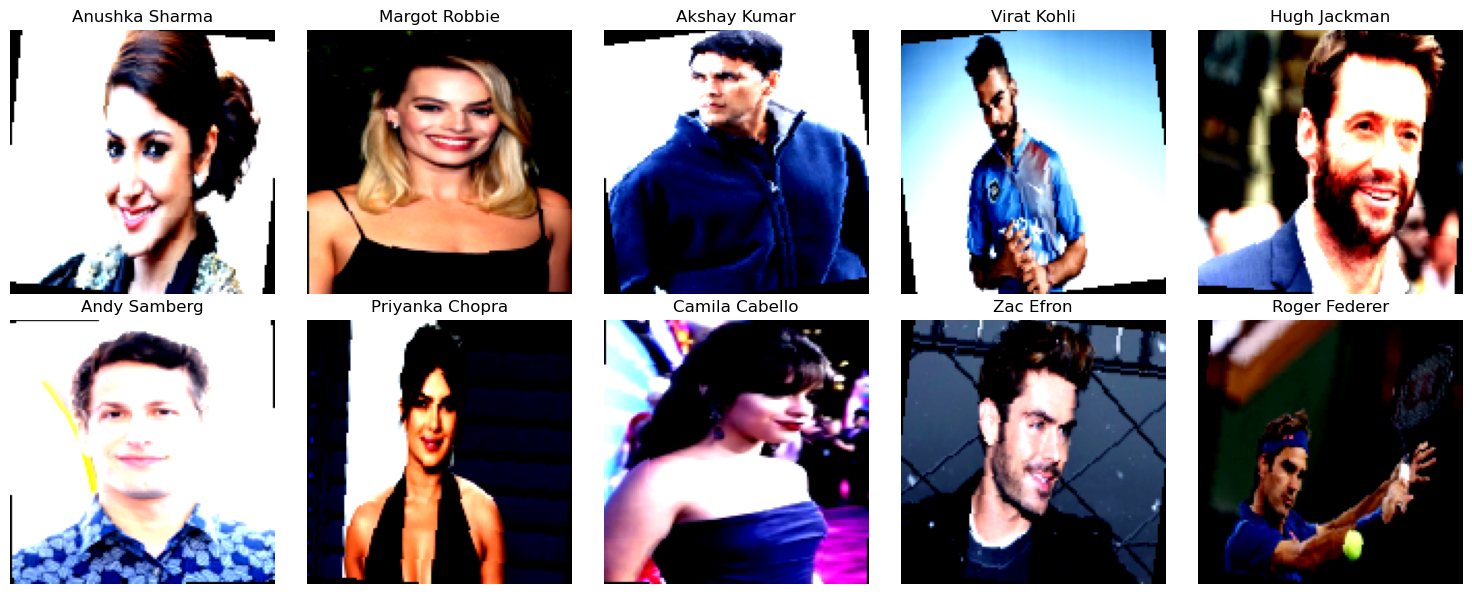

In [15]:
def imshow(img, title=None):
    img = img.numpy().transpose((1, 2, 0))
    img = img * 0.5 + 0.5  # unnormalize if normalized from [-1, 1]
    plt.imshow(img)
    if title:
        plt.title(title)
    plt.axis('off')

plt.figure(figsize=(15, 6))
for i in range(10):
    idx = random.randint(0, len(train_data) - 1)
    img, label = train_data[idx]
    plt.subplot(2, 5, i+1)
    imshow(img, title=full_dataset.classes[label])
plt.tight_layout()
plt.show()

In [16]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = FaceCNN(num_classes=len(full_dataset.classes)).to(device)

criterion = nn.CrossEntropyLoss()

In [17]:
optimizer = torch.optim.Adam(model.parameters(), lr=0.001, weight_decay=1e-4)


In [18]:
# --- 9. Training and Validation Functions ---
def train_epoch(model, loader, criterion, optimizer):
    model.train()
    running_loss = 0
    for images, labels in loader:
        images, labels = images.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
    return running_loss / len(loader)

def evaluate(model, loader):
    model.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for images, labels in loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            _, preds = torch.max(outputs, 1) 
            correct += (preds == labels).sum().item()
            total += labels.size(0)
    return correct / total

def compute_loss(model, loader, criterion):
    model.eval()
    running_loss = 0
    with torch.no_grad():
        for images, labels in loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            loss = criterion(outputs, labels)
            running_loss += loss.item()
    return running_loss / len(loader)

## Training

In [19]:
# --- 10. Training Loop ---
num_epochs = 30
train_losses, val_accuracies = [], []
train_accuracies, val_losses = [], []

for epoch in range(num_epochs):
    train_loss = train_epoch(model, train_loader, criterion, optimizer)
    val_loss = compute_loss(model, val_loader, criterion)
    train_acc = evaluate(model, train_loader)
    val_acc = evaluate(model, val_loader)
    train_losses.append(train_loss)
    val_losses.append(val_loss)
    train_accuracies.append(train_acc)
    val_accuracies.append(val_acc)
    print(f"Epoch {epoch+1}/{num_epochs}, "
          f"Train Loss: {train_loss:.4f}, Train Acc: {train_acc:.4f}, "
          f"Val Loss: {val_loss:.4f}, Val Acc: {val_acc:.4f}")
    checkpoint_path = f"plant_cnn_epoch{epoch+1}.pth"
    #torch.save(model.state_dict(), checkpoint_path)
    #print(f"Model saved to {checkpoint_path}")


Epoch 1/30, Train Loss: 3.4183, Train Acc: 0.0625, Val Loss: 3.3793, Val Acc: 0.0417
Epoch 2/30, Train Loss: 3.3339, Train Acc: 0.0915, Val Loss: 3.2554, Val Acc: 0.0964
Epoch 3/30, Train Loss: 3.2474, Train Acc: 0.1394, Val Loss: 3.1530, Val Acc: 0.1042
Epoch 4/30, Train Loss: 3.1304, Train Acc: 0.1523, Val Loss: 3.0459, Val Acc: 0.1380
Epoch 5/30, Train Loss: 3.0248, Train Acc: 0.1673, Val Loss: 2.9725, Val Acc: 0.1589
Epoch 6/30, Train Loss: 2.9339, Train Acc: 0.2131, Val Loss: 2.8778, Val Acc: 0.1745
Epoch 7/30, Train Loss: 2.8439, Train Acc: 0.2309, Val Loss: 2.7990, Val Acc: 0.1823
Epoch 8/30, Train Loss: 2.8066, Train Acc: 0.2476, Val Loss: 2.7010, Val Acc: 0.1927
Epoch 9/30, Train Loss: 2.7468, Train Acc: 0.2476, Val Loss: 2.7370, Val Acc: 0.2109
Epoch 10/30, Train Loss: 2.6863, Train Acc: 0.2616, Val Loss: 2.6408, Val Acc: 0.1953
Epoch 11/30, Train Loss: 2.5914, Train Acc: 0.2978, Val Loss: 2.6107, Val Acc: 0.2135
Epoch 12/30, Train Loss: 2.5282, Train Acc: 0.3397, Val Loss: 2

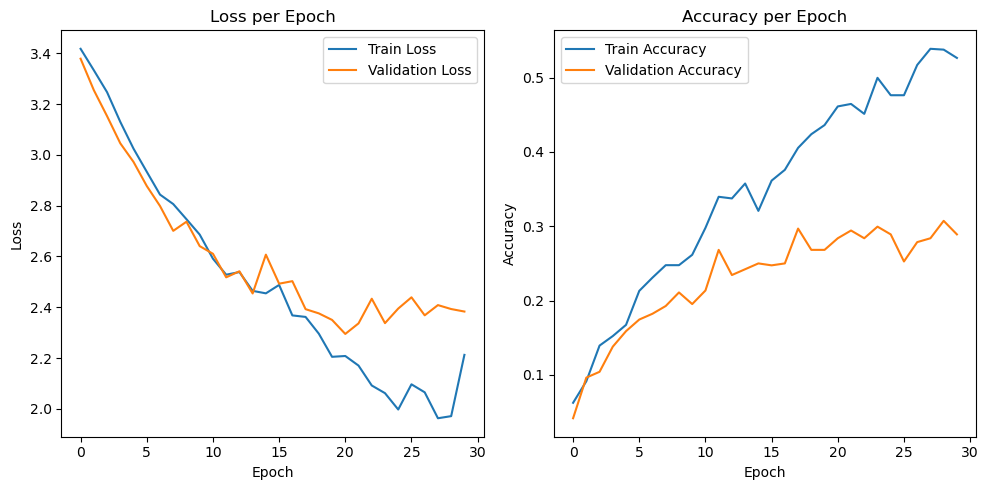

In [20]:
# --- 11. Plot Training History ---
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.plot(train_losses, label='Train Loss')
plt.plot(val_losses, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Loss per Epoch')

plt.subplot(1,2,2)
plt.plot(train_accuracies, label='Train Accuracy')
plt.plot(val_accuracies, label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Accuracy per Epoch')

plt.tight_layout()
plt.show()

## Final Test Evaluation

In [21]:
# --- 12. Testing and Evaluation ---
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
model.eval()
all_preds = []
all_labels = []

with torch.no_grad():
    for images, labels in test_loader:
        images = images.to(device)
        outputs = model(images)
        _, preds = torch.max(outputs, 1)
        all_preds.extend(preds.cpu().numpy())
        all_labels.extend(labels.numpy())

print("\nClassification Report:")
print(classification_report(all_labels, all_preds, target_names=full_dataset.classes))


Classification Report:
                    precision    recall  f1-score   support

      Akshay Kumar       0.00      0.00      0.00         7
Alexandra Daddario       0.38      0.36      0.37        14
        Alia Bhatt       0.29      0.25      0.27        16
  Amitabh Bachchan       0.50      0.07      0.12        15
      Andy Samberg       0.20      0.07      0.11        14
    Anushka Sharma       0.40      0.15      0.22        13
     Billie Eilish       0.47      0.62      0.53        13
         Brad Pitt       0.28      0.31      0.29        16
    Camila Cabello       0.43      0.30      0.35        10
   Charlize Theron       0.31      0.33      0.32        15
       Claire Holt       0.17      0.36      0.23        11
      Courtney Cox       0.50      0.20      0.29        15
    Dwayne Johnson       0.50      0.42      0.45        12
   Elizabeth Olsen       0.00      0.00      0.00        12
   Ellen Degeneres       0.14      0.10      0.12        10
      Henry Cav

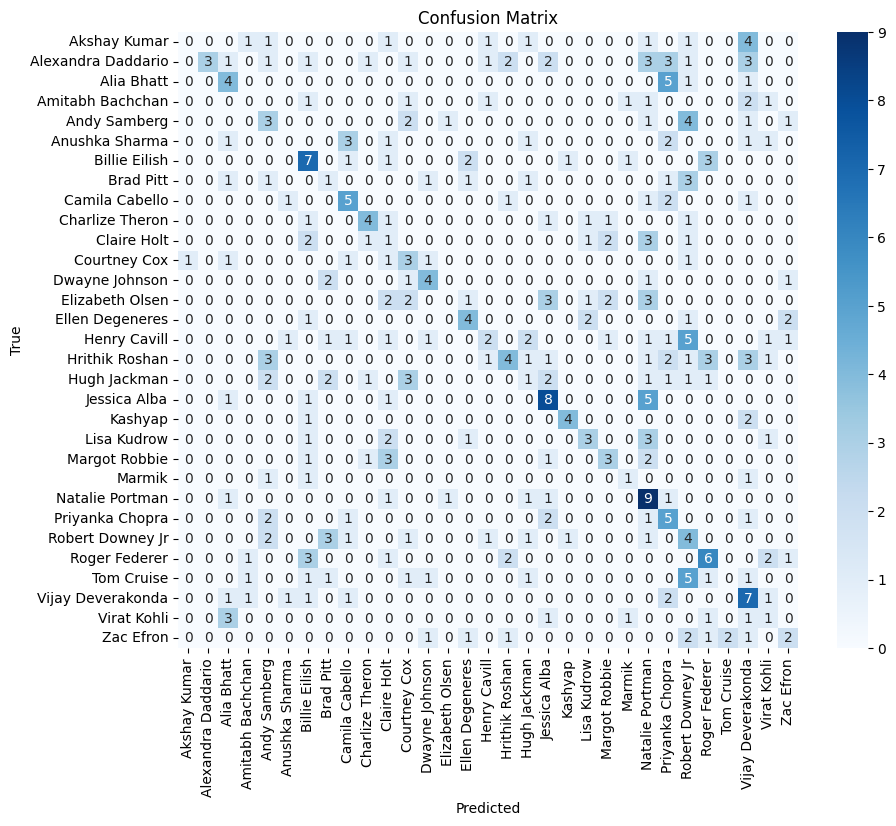

In [27]:
# --- 13. Confusion Matrix ---
import seaborn as sns
cm = confusion_matrix(all_labels, all_preds)
plt.figure(figsize=(10,8))
sns.heatmap(cm, annot=True, fmt='d', xticklabels=full_dataset.classes, yticklabels=full_dataset.classes, cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.558952..1.4627016].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.558952..1.6108497].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.558952..0.7254046].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.558952..1.7677125].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.558952..1.6282789].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.558952..1.4627016].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.558952..1.82

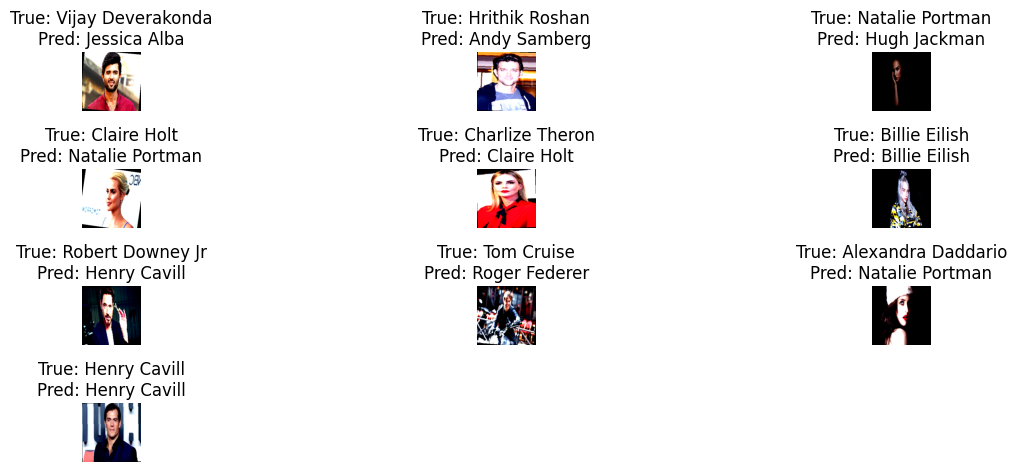

In [ ]:
# --- 14. Show Random Sample Predictions from Test Set ---
def show_random_predictions(model, dataset, class_names, num_images=10):
    model.eval()
    plt.figure(figsize=(12, 6))
    indices = random.sample(range(len(dataset)), num_images)
    with torch.no_grad():
        for i, idx in enumerate(indices):
            img, label = dataset[idx]
            input_img = img.unsqueeze(0).to(device)
            output = model(input_img)
            _, pred = torch.max(output, 1)
            img_disp = img.cpu()
            true_label = class_names[label]
            pred_label = class_names[pred.item()]
            plt.subplot( num_images//2,3, i+1)
            imshow(img_disp, title=f"True: {true_label}\nPred: {pred_label}")
    plt.tight_layout()
    plt.show()

show_random_predictions(model1, test_data, full_dataset.classes, num_images=10)